In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv("data/jobs.csv")
df = df.dropna(subset=["skills"]).drop_duplicates()
df

In [3]:
all_skills = []
for skill in df["skills"]:
    skill_list = [skill.strip() for skill in skill.split(",")]
    all_skills.extend(skill_list)

skill_counts = Counter(all_skills)
skill_df = pd.DataFrame(skill_counts.items(), columns=["skill", "count"])
skill_df = skill_df.sort_values("count", ascending=False)
total_jobs = df.shape[0]
skill_df["percentage"] = skill_df["count"] / total_jobs * 100

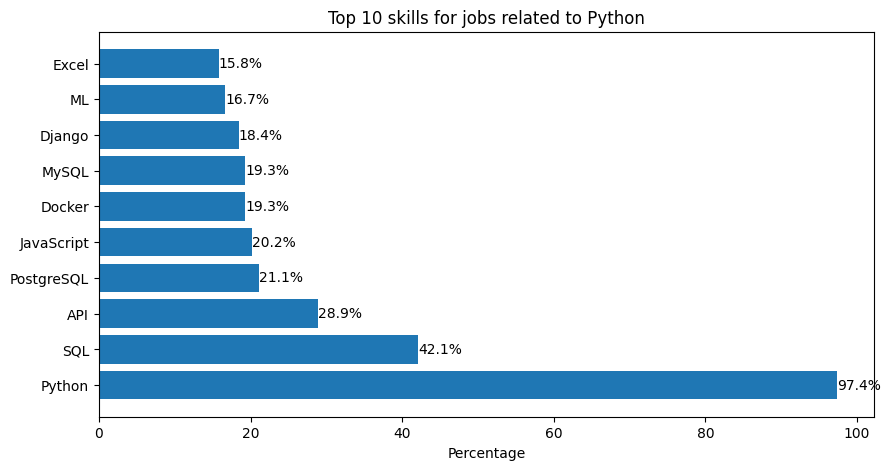

In [4]:
plt.figure(figsize = (10, 15))
bar = plt.barh(skill_df["skill"], skill_df["percentage"])
plt.bar_label(bar, fmt="%1.1f%%")
plt.show()